In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [ ]:
def rosenbrock(x, a=1, b=100):
  return sum((a - x[i])**2 + b*(x[i+1] - x[i]**2)**2 for i in range(len(x) - 1))

# Algoritmo Genético

In [ ]:
def fitness(individual):
    return rosenbrock(individual)

def init_population(size, bounds, d=30):
    population = []
    for _ in range(size):
        genome = [random.uniform(bounds[0], bounds[1]) for _ in range(d)]
        fit = fitness(genome)
        population.append((genome, fit))
    return population

def tournament_selection(population, k=6):
    competitors = random.sample(population, k)
    competitors.sort(key=lambda ind: ind[1])
    return competitors[0][0], competitors[1][0]

def crossover(parent1, parent2, alpha=0.5):
    child = []
    for x, y in zip(parent1, parent2):
        d = abs(x - y)
        low = min(x, y) - alpha * d
        high = max(x, y) + alpha * d
        child.append(random.uniform(low, high))
    return child

def mutate(individual, bounds, mutation_prob = 0.1):
    mutated = individual[:]
    for i in range(len(mutated)):
        if random.random() < mutation_prob:
            mutated[i] = max(bounds[0], bounds[1])
    return mutated

def breed(parent1, parent2, bounds, crossover_rate=0.9, mutation_rate=0.3):
    if random.random() < crossover_rate:
        child1 = crossover(parent1, parent2)
    else:
        child1 = parent1[:]
    if random.random() < crossover_rate:
        child2 = crossover(parent2, parent1)
    else:
        child2 = parent2[:]

    if random.random() < mutation_rate:
        child1 = mutate(child1, bounds)
    if random.random() < mutation_rate:
        child2 = mutate(child2, bounds)

    return (child1, fitness(child1)), (child2, fitness(child2))

def update_population(population, offspring, elitism_size=5):
    population.sort(key=lambda ind: ind[1])
    elites = population[:elitism_size]
    rest = population[elitism_size:]

    for child in offspring:
        child_genome, child_fitness = child
        worst_idx = max(range(len(rest)), key=lambda i: rest[i][1])
        worst_fitness = rest[worst_idx][1]

        if child_fitness < worst_fitness:
            rest[worst_idx] = child

    population[:] = elites + rest

def genetic_algorithm():
  size = 500
  elitism_size = int(0.05 * size)
  bounds = (-2, 2)
  d = 30
  n = 0.05
  n_pair = int(n * size)
  max_generations = 10000
  epsilon = 0.05
  max_no_improvement = 100

  population = init_population(size, bounds, d)
  generation = 0

  no_improvement = 0
  best_avg_fitness = float('inf')

  # Listas para armazenar histórico
  best_fitness_history = []
  avg_fitness_history = []

  while True:
      generation += 1

      for _ in range(n_pair):
          parent1, parent2 = tournament_selection(population)
          child1, child2 = breed(parent1, parent2, bounds)
          update_population(population, [child1, child2], elitism_size)

      avg_fitness = sum(ind[1] for ind in population) / len(population)
      current_best = min(ind[1] for ind in population)

      # Guarda histórico
      best_fitness_history.append(current_best)
      avg_fitness_history.append(avg_fitness)

      if avg_fitness < best_avg_fitness - epsilon:
          best_avg_fitness = avg_fitness
          no_improvement = 0
      else:
          no_improvement += 1

      # if generation % 100 == 0:
          # print(f"Geração {generation} | Melhor fitness: {current_best:.6f} | Média: {avg_fitness:.6f} | Estagnação: {no_improvement}")

      if no_improvement >= max_no_improvement:
          print(f"Estagnado após {max_no_improvement} gerações. Melhor fitness: {current_best:.6f} na geração: {generation}")
          break

      if best_avg_fitness <= epsilon:
          print(f'Solução encontrada na geração {generation} com fitness {current_best:.8f}')
          break

      if generation >= max_generations:
          print(f'Solução não encontrada após {max_generations} gerações. Melhor fitness: {current_best:.6f}')
          break

  return current_best, generation, avg_fitness_history

# Estratégia Evolutiva

In [ ]:
def fitness(individual):
    return rosenbrock(individual)

def init_population(size, bounds, d=30):
    population = []
    for _ in range(size):
        genome = [random.uniform(bounds[0], bounds[1]) for _ in range(d)]
        fit = fitness(genome)
        population.append((genome, fit))
    return population

def mutation(individual, bounds, sigma=0.1):
    mutated = [x + random.gauss(0, sigma) for x in individual]
    return [max(bounds[0], min(bounds[1], x)) for x in mutated]

def global_recombine(parents):
    d = len(parents[0][0])
    child = []
    for i in range(d):
        gene_avg = sum(p[0][i] for p in parents) / len(parents)
        child.append(gene_avg)
    return child

def evolutive_strategy():
  mu = 100
  lamb = 500
  d = 30
  bounds = (-2, 2)
  sigma = 0.1
  max_generations = 10000
  epsilon = 0.05
  max_no_improve = 100
  k_recomb = 10

  population = init_population(mu, bounds, d)

  best_fitness_history = []
  avg_fitness_history = []
  best_avg_fitness = float('inf')
  no_improvement = 0
  generation = 0

  while True:
      generation += 1
      offspring = []

      for _ in range(lamb):
          parents = random.sample(population, k_recomb)
          child = global_recombine(parents)
          child = mutation(child, bounds, sigma)
          offspring.append((child, fitness(child)))

      # Seleção (μ + λ): melhores entre pais + filhos
      population = sorted(population + offspring, key=lambda ind: ind[1])[:mu]

      avg_fit = sum(ind[1] for ind in population) / mu
      best_fit = population[0][1]

      best_fitness_history.append(best_fit)
      avg_fitness_history.append(avg_fit)

      if avg_fit < best_avg_fitness - epsilon:
          best_avg_fitness = avg_fit
          no_improvement = 0
      else:
          no_improvement += 1

      # if generation % 100 == 0:
          # print(f"Geração {generation} | Melhor fitness: {best_fit:.6f} | Média: {avg_fit:.6f} | Estagnação: {no_improvement}")

      if best_fit <= epsilon:
          print(f"Solução encontrada na geração {generation}: fitness = {best_fit:.8f}")
          break
      if no_improvement >= max_no_improve:
          print(f"Estagnado após {max_no_improve} gerações. Melhor fitness: {best_fit:.6f} na geração: {generation}")
          break
      if generation >= max_generations:
          print(f"Limite de gerações atingido. Melhor fitness: {best_fit:.6f}")
          break

  return best_fit, generation, avg_fitness_history

# Comparação

Execução 1/30
Estagnado após 100 gerações. Melhor fitness: 35.124456 na geração: 990
Execução 2/30
Estagnado após 100 gerações. Melhor fitness: 34.063856 na geração: 1124
Execução 3/30
Estagnado após 100 gerações. Melhor fitness: 35.053397 na geração: 1109
Execução 4/30
Estagnado após 100 gerações. Melhor fitness: 33.608551 na geração: 1346
Execução 5/30
Estagnado após 100 gerações. Melhor fitness: 35.092836 na geração: 749
Execução 6/30
Estagnado após 100 gerações. Melhor fitness: 34.007078 na geração: 1194
Execução 7/30
Estagnado após 100 gerações. Melhor fitness: 35.257453 na geração: 1188
Execução 8/30
Estagnado após 100 gerações. Melhor fitness: 34.871675 na geração: 1453
Execução 9/30
Estagnado após 100 gerações. Melhor fitness: 34.531180 na geração: 1367
Execução 10/30
Estagnado após 100 gerações. Melhor fitness: 33.187757 na geração: 992
Execução 11/30
Estagnado após 100 gerações. Melhor fitness: 33.893692 na geração: 855
Execução 12/30
Estagnado após 100 gerações. Melhor fitne

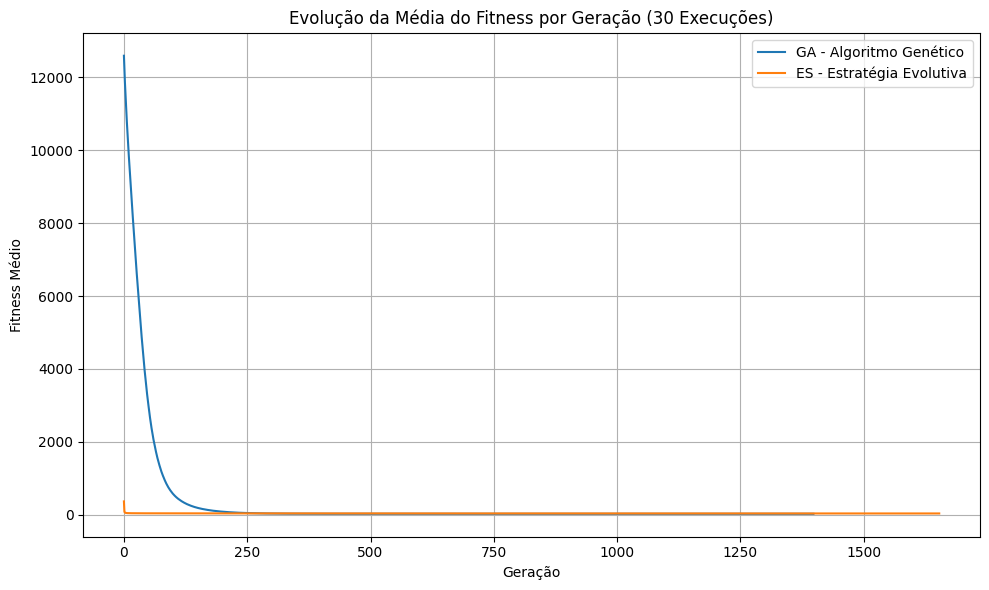

/tmp/ipython-input-8-3968179240.py:73: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([fitness_ga, fitness_es], labels=["GA", "ES"])
/tmp/ipython-input-8-3968179240.py:80: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([gens_ga, gens_es], labels=["GA", "ES"])


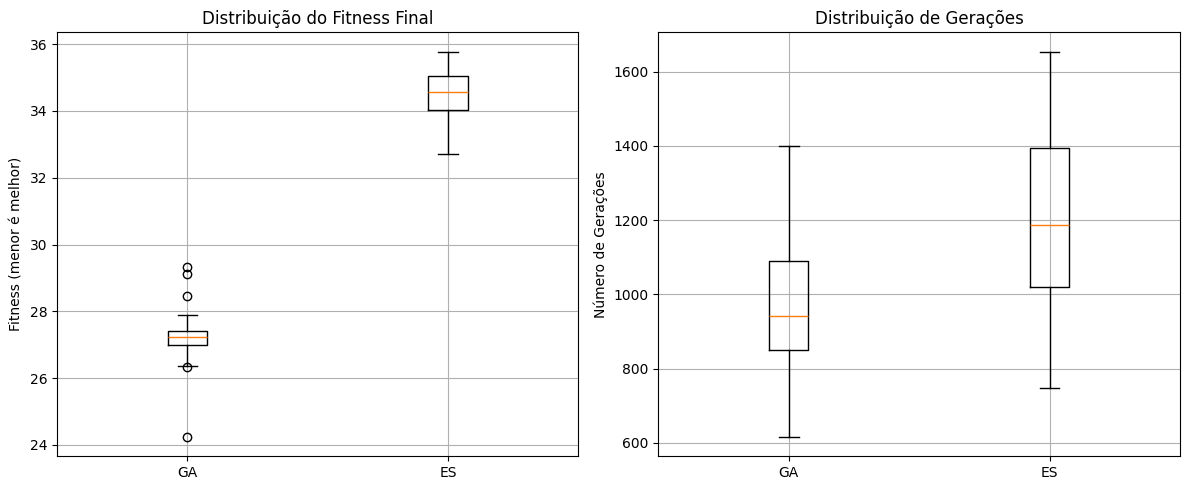

In [ ]:
def solver(num_simulations=30, type=None):

    resultados = []
    historico_por_execucao = []

    for i in range(num_simulations):
        print(f"Execução {i+1}/{num_simulations}")
        if type == "ES":
            best, gen, hist = evolutive_strategy()
        else:
            best, gen, hist = genetic_algorithm()
        resultados.append((best, gen))
        historico_por_execucao.append(hist)

    return resultados, historico_por_execucao

resultados_ES, historico_ES = solver(type="ES")
resultados_GA, historico_GA = solver()

def media_fitness_geracao(historicos):
    max_gen = max(len(h) for h in historicos)
    acumulado = [[] for _ in range(max_gen)]

    for h in historicos:
        for i in range(len(h)):
            acumulado[i].append(h[i])

    medias = [np.mean(ger) for ger in acumulado]
    return medias

medias_GA = media_fitness_geracao(historico_GA)
medias_ES = media_fitness_geracao(historico_ES)

def analisar_resultados(resultados, nome):
    fitness = [r[0] for r in resultados]
    generations = [r[1] for r in resultados]

    print(f"\n{nome}")
    print(f"{'-'*len(nome)}")
    print(f"Melhor fitness: {min(fitness):.6f}")
    print(f"Fitness médio: {np.mean(fitness):.6f}")
    print(f"Desvio padrão do fitness: {np.std(fitness):.6f}")
    print(f"Média de gerações: {np.mean(generations):.2f}")
    print(f"Máximo de gerações: {max(generations)}")

# Análise
analisar_resultados(resultados_GA, "Algoritmo Genético")
analisar_resultados(resultados_ES, "Estratégias Evolutivas")

# Medias de gerações
plt.figure(figsize=(10, 6))
plt.plot(medias_GA, label="GA - Algoritmo Genético")
plt.plot(medias_ES, label="ES - Estratégia Evolutiva")
plt.xlabel("Geração")
plt.ylabel("Fitness Médio")
plt.title("Evolução da Média do Fitness por Geração (30 Execuções)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Extrair dados
fitness_ga = [r[0] for r in resultados_GA]
fitness_es = [r[0] for r in resultados_ES]
gens_ga = [r[1] for r in resultados_GA]
gens_es = [r[1] for r in resultados_ES]

# Gráfico de boxplot lado a lado
plt.figure(figsize=(12, 5))

# Boxplot dos fitness
plt.subplot(1, 2, 1)
plt.boxplot([fitness_ga, fitness_es], labels=["GA", "ES"])
plt.title("Distribuição do Fitness Final")
plt.ylabel("Fitness (menor é melhor)")
plt.grid(True)

# Boxplot das gerações
plt.subplot(1, 2, 2)
plt.boxplot([gens_ga, gens_es], labels=["GA", "ES"])
plt.title("Distribuição de Gerações")
plt.ylabel("Número de Gerações")
plt.grid(True)

plt.tight_layout()
plt.show()